# Homework 2

## Task 1

### Subtask 1

In [1]:
import h5py
import numpy as np

hf = h5py.File('toy-regression.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()

Text(0.5, 1.0, 'Plot over x2 and y')

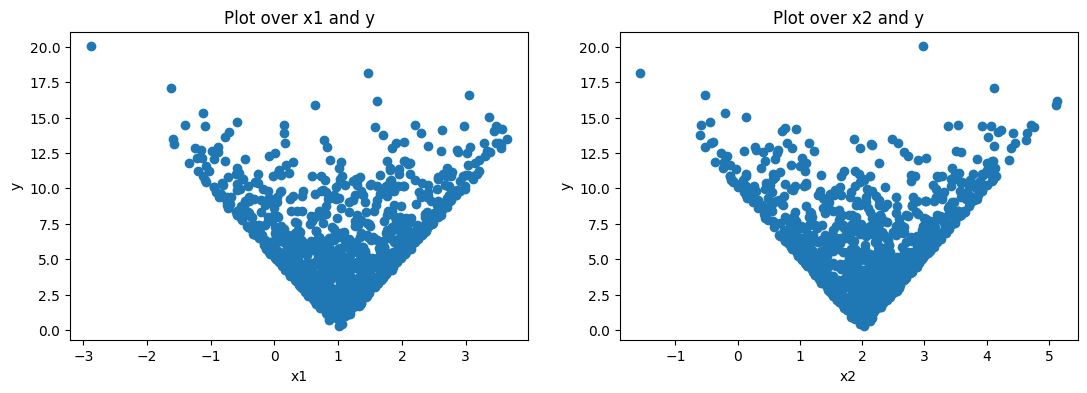

In [2]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.scatter(x_train[:, 0], y_train)
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title('Plot over x1 and y')
ax2.scatter(x_train[:, 1], y_train)
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.set_title('Plot over x2 and y')

In [3]:
#adding features for training test
x1_fin_train = np.abs(x_train[:, 0] - 1)
x2_fin_train = np.abs(x_train[:, 1] - 2)
x1x2_multiplication_train = np.abs(x_train[:, 0] * x_train[:, 1])
x1x2_minus_train = np.abs(x1_fin_train - x2_fin_train)

#calculating the norm of every row of 1st and 2nd additional feature
x1x2_norm_train =  x1_fin_train
x1x2_norm_train = np.column_stack((x1x2_norm_train, x2_fin_train))
x1x2_norm_train = np.linalg.norm(x1x2_norm_train, axis=1)

x_np_train = x_train
x_np_train = np.hstack((x_np_train, x1_fin_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x2_fin_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x1x2_multiplication_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x1x2_minus_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x1x2_norm_train.reshape(-1, 1)))

print(x_np_train.shape)

(1000, 7)


In [4]:
#adding features for the test set
x1_fin_test = np.abs(x_test[:, 0] - 1)
x2_fin_test = np.abs(x_test[:, 1] - 2)
x1x2_multiplication_test = np.abs(x_test[:, 0] * x_test[:, 1])
x1x2_minus_test = np.abs(x1_fin_test - x2_fin_test)

x1x2_norm_test =  x1_fin_test
x1x2_norm_test = np.column_stack((x1x2_norm_test, x2_fin_test))
x1x2_norm_test = np.linalg.norm(x1x2_norm_test, axis=1)

x_np_test = x_test
x_np_test = np.hstack((x_np_test, x1_fin_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x2_fin_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x1x2_multiplication_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x1x2_minus_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x1x2_norm_test.reshape(-1, 1)))

print(x_np_test.shape)

(1000, 7)


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_np_train, y_train)
y_pred = model.predict(x_np_test)

squared_errors = (y_test - y_pred) ** 2
mse = np.mean(squared_errors)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.007459047308258194


#### Polynomial features

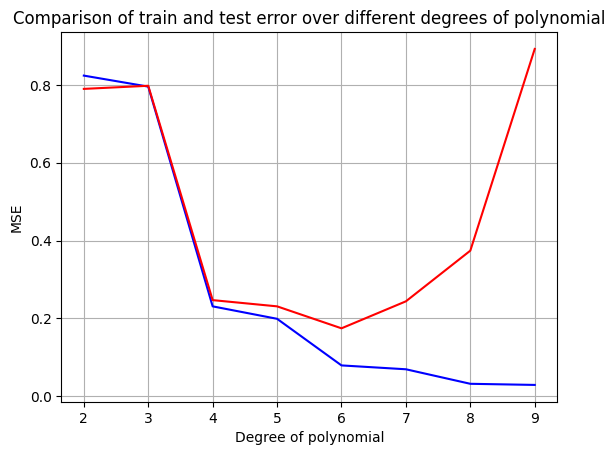

In [6]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

mse_degrees_test = []
mse_degrees_train = []
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)

for degree in range(2, 10):
    poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
    poly.fit(scaler.transform(x_train))
    x_train_poly = poly.transform(scaler.transform(x_train))
    x_test_poly = poly.transform(scaler.transform(x_test))
    
    # fit linear regression model
    lr = LinearRegression(fit_intercept=True)
    lr.fit(x_train_poly, y_train)
    y_pred_test = lr.predict(x_test_poly)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_degrees_test.append(mse_test)

    y_pred_train = lr.predict(x_train_poly)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_degrees_train.append(mse_train)

degrees = [i for i in range(2, 10)]
plt.plot(degrees, mse_degrees_train, 'b', label='Training set')
plt.plot(degrees, mse_degrees_test, 'r', label='Test set')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.title("Comparison of train and test error over different degrees of polynomial")
plt.grid()

In [7]:
print(f"From the plot we can see that the optimal degree of polynomial is 6, which has a mean squared error of: {mse_degrees_test[4]}.")

From the plot we can see that the optimal degree of polynomial is 6, which has a mean squared error of: 0.1746019540792256.


### Subtask 2

In [8]:
hf = h5py.File('toy-classification.h5', 'r')
x_train = np.array(hf.get('x_train'))
y_train = np.array(hf.get('y_train'))
x_test = np.array(hf.get('x_test'))
y_test = np.array(hf.get('y_test'))
hf.close()

Text(0.5, 1.0, 'Plot over x2 and y')

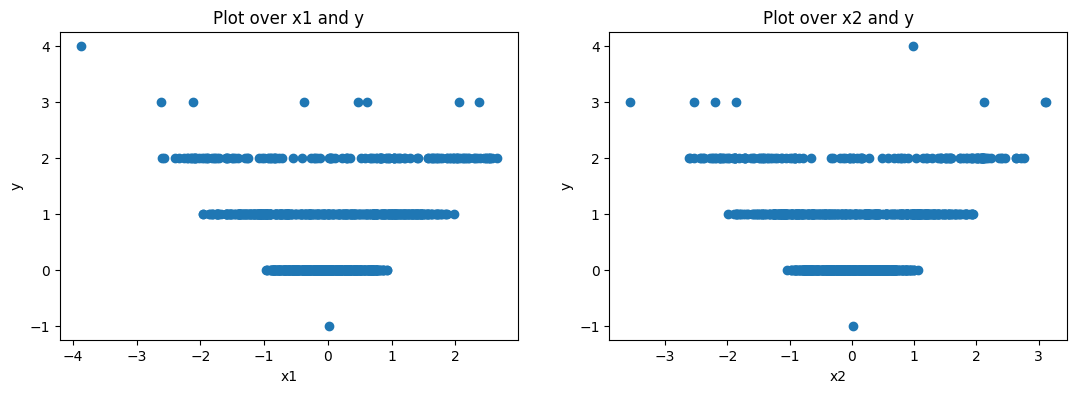

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
ax1.scatter(x_train[:, 0], y_train)
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title('Plot over x1 and y')
ax2.scatter(x_train[:, 1], y_train)
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.set_title('Plot over x2 and y')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
x1_fin_train = np.cos(x_train_scaled[:, 0])
x2_fin_train = np.cos(x_train_scaled[:, 1])
x1_exp =  np.exp(np.abs(x_train_scaled[:, 0]))
x2_exp =  np.exp(np.abs(x_train_scaled[:, 1]))
x_diff_train = np.abs(x_train_scaled[:, 0] - x_train_scaled[:, 1])


x1x2_norm_train =  x_train_scaled[:, 0]
x1x2_norm_train = np.column_stack((x1x2_norm_train, x_train_scaled[:, 1]))
x1x2_norm_train = np.linalg.norm(x1x2_norm_train, axis=1)


x_np_train = x_train_scaled
x_np_train = np.hstack((x_np_train, x1_fin_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x2_fin_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x1_exp.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x2_exp.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x1x2_norm_train.reshape(-1, 1)))
x_np_train = np.hstack((x_np_train, x_diff_train.reshape(-1, 1)))


print(x_np_train.shape)

(1000, 8)


In [12]:
x1_fin_test = np.cos(x_test_scaled[:, 0])
x2_fin_test = np.cos(x_test_scaled[:, 1])
x1_exp =  np.exp(np.abs(x_test_scaled[:, 0]))
x2_exp =  np.exp(np.abs(x_test_scaled[:, 1]))
x_diff_test = np.abs(x_test_scaled[:, 0] - x_test_scaled[:, 1])


x1x2_norm_test =  x_test_scaled[:, 0]
x1x2_norm_test = np.column_stack((x1x2_norm_test, x_test_scaled[:, 1]))
x1x2_norm_test = np.linalg.norm(x1x2_norm_test, axis=1)

x_np_test = x_test_scaled
x_np_test = np.hstack((x_np_test, x1_fin_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x2_fin_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x1_exp.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x2_exp.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x1x2_norm_test.reshape(-1, 1)))
x_np_test = np.hstack((x_np_test, x_diff_test.reshape(-1, 1)))


print(x_np_test.shape)

(1000, 8)


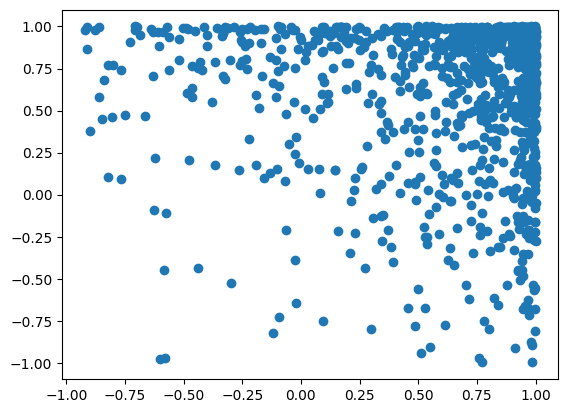

In [13]:
plt.scatter(x1_fin_train, x1_fin_test)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC(max_iter=1000000)
model.fit(x_np_train, y_train)
y_pred = model.predict(x_np_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


C:\Users\Predrag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [15]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[361  11   0   0   0]
 [ 14 478   8   0   0]
 [  0   7 107   0   0]
 [  0   0   8   4   2]
 [  0   0   0   0   0]]


## Task 2

### Subtask 1

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


california_housing = fetch_california_housing()
california_housing.data.shape

(20640, 8)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.7, random_state=42)
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred_test = model.predict(x_test_scaled)

squared_errors = (y_test - y_pred_test) ** 2
mse_test = np.mean(squared_errors)

y_pred_train = model.predict(x_train_scaled)
squared_errors = (y_train - y_pred_train) ** 2
mse_train = np.mean(squared_errors)

print(f"Mean Squared Error of the test set: {mse_test}")
print(f"Mean Squared Error of the train set: {mse_train}")

Mean Squared Error of the test set: 0.5275236518754021
Mean Squared Error of the train set: 0.5229818274185227


In [19]:
y_train.shape

(6192,)

In [20]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(scaler.transform(x_train_scaled))
x_train_poly = poly.transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# fit linear regression model
lr = LinearRegression()
lr.fit(x_train_poly, y_train)
y_pred_test = lr.predict(x_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error of the test set: {mse_test}")
y_pred_train = lr.predict(x_train_poly)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error of the train set: {mse_train}")

Mean Squared Error of the test set: 20.79590845467501
Mean Squared Error of the train set: 0.39774084890170935


### Subtask 2

In [21]:
# Define the number of iterations
n_iterations = 20

mse_scores = []

for _ in range(n_iterations):
    X_train, X_test, y_train1, y_test = train_test_split(x_train_scaled, y_train, test_size=0.1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train1)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the MSE for this iteration
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the average MSE over all iterations
average_mse = np.mean(mse_scores)

# Calculate the variance of the MSE scores
mse_variance = np.var(mse_scores)

print("Average MSE (Monte Carlo CV):", average_mse)
print("Variance of MSE scores:", mse_variance)

Average MSE (Monte Carlo CV): 2.8151073689985586
Variance of MSE scores: 47.01968667938884


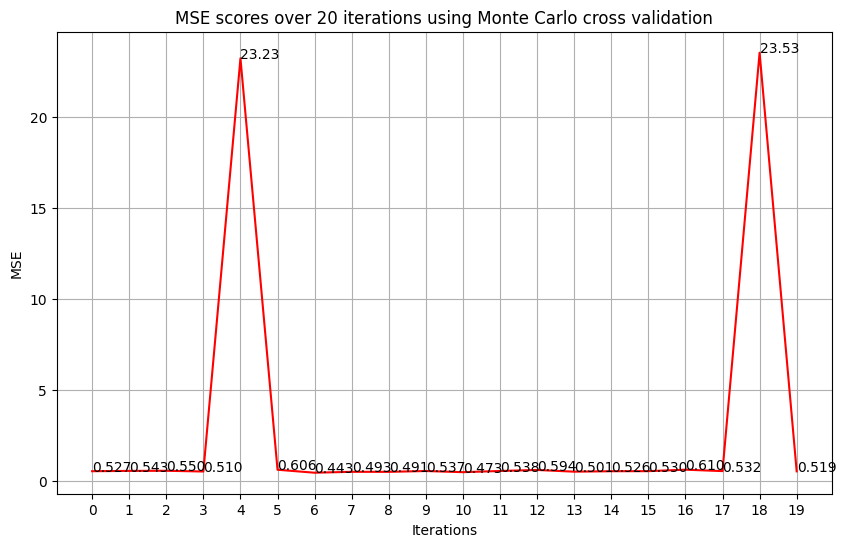

In [22]:
iter = [i for i in range(20)]

fig = plt.figure(figsize=(10, 6))
plt.plot(iter, mse_scores, 'r')
plt.xticks(np.arange(min(iter), max(iter)+1, 1.0))
plt.title("MSE scores over 20 iterations using Monte Carlo cross validation")
plt.xlabel("Iterations")
plt.ylabel("MSE")
for a,b in zip(iter, mse_scores): 
    plt.text(a, b, str(b)[0:5])
plt.grid()

In [23]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [24]:
from sklearn.utils import shuffle

def kfold(k, iterations, x_arg, y_arg):
    mse_scores = []
    for i in range(iterations):
        X = shuffle(x_arg)
        y = shuffle(y_arg)
        folds = kfold_indices(X, k)
        iteration_mse_scores = []
        
        for train_indices, test_indices in folds:
            X_train, y_train1 = X[train_indices], y[train_indices]
            X_test, y_test = X[test_indices], y[test_indices]
    
            model = LinearRegression()
            model.fit(X_train, y_train1)
            
            y_pred = model.predict(X_test)
            
            mse = mean_squared_error(y_test, y_pred)
            iteration_mse_scores.append(mse)
            
        mse_scores.append(np.mean(iteration_mse_scores))
    return mse_scores
        
    

# Calculate the mean accuracy across all folds
mse_scores10 = kfold(10, 20, x_train_scaled, y_train)
mean_accuracy = np.mean(mse_scores10)
mse_var = np.var(mse_scores10)
print("K-Fold Cross-Validation Scores:", mse_scores10)
print("Mean MSE:", mean_accuracy)
print("Variance:", mse_var)

K-Fold Cross-Validation Scores: [1.3556848407724849, 1.3458092610637862, 1.35607846050792, 1.3513205858965784, 1.3771003397771524, 1.3498277421221077, 1.357043660589605, 1.349157682528454, 1.3421261201339847, 1.3434891244597786, 1.343616526174783, 1.3546482022445776, 1.373114049822564, 1.3464522873881264, 1.357579348394076, 1.3400816933113038, 1.340455251552759, 1.3385340583428154, 1.3377670076539765, 1.4330645682132908]
Mean MSE: 1.3546475405475062
Variance: 0.0004291353475690183


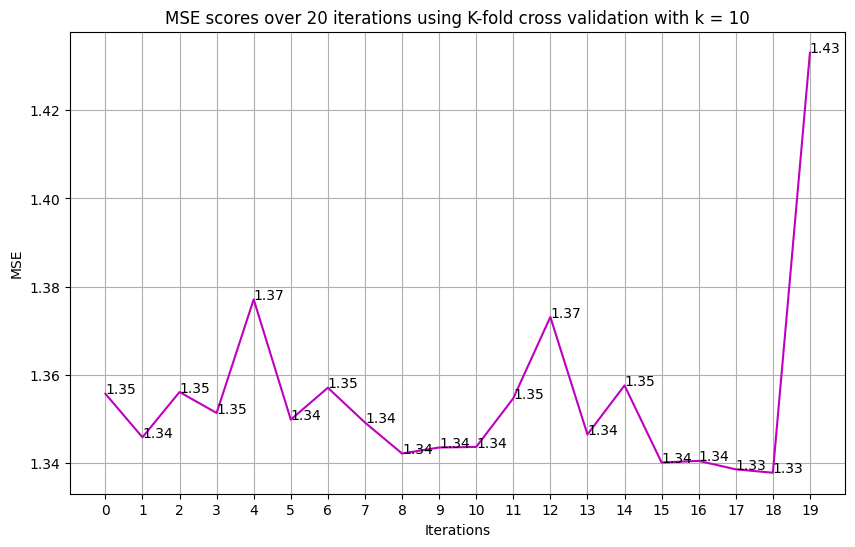

In [25]:
iter = [i for i in range(20)]

fig = plt.figure(figsize=(10, 6))
plt.plot(iter, mse_scores10, 'm')
plt.xticks(np.arange(min(iter), max(iter)+1, 1.0))
plt.title("MSE scores over 20 iterations using K-fold cross validation with k = 10")
plt.xlabel("Iterations")
plt.ylabel("MSE")
for a,b in zip(iter, mse_scores10): 
    plt.text(a, b, str(b)[0:4])
plt.grid()

In [26]:
mse_scores20 = kfold(20, 20, x_train_scaled, y_train)
mean_accuracy = np.mean(mse_scores20)
mse_var = np.var(mse_scores20)
print("K-Fold Cross-Validation Scores:", mse_scores20)
print("Mean MSE:", mean_accuracy)
print("Variance:", mse_var)

K-Fold Cross-Validation Scores: [1.3395767404306291, 1.3496464689747545, 1.3663071128240711, 1.3450359096400493, 1.3423041708255619, 1.3530881190468436, 1.339555349902946, 1.3467157629425004, 1.3411659879987252, 1.3515340239841862, 1.3715179923413507, 1.3639786162316716, 1.3433436114580133, 1.341888493572401, 1.341711608006314, 1.3463573276351195, 1.3410924490319132, 1.351525230980878, 1.3410279494048682, 1.3390744182548395]
Mean MSE: 1.3478223671743819
Variance: 8.527785104146586e-05


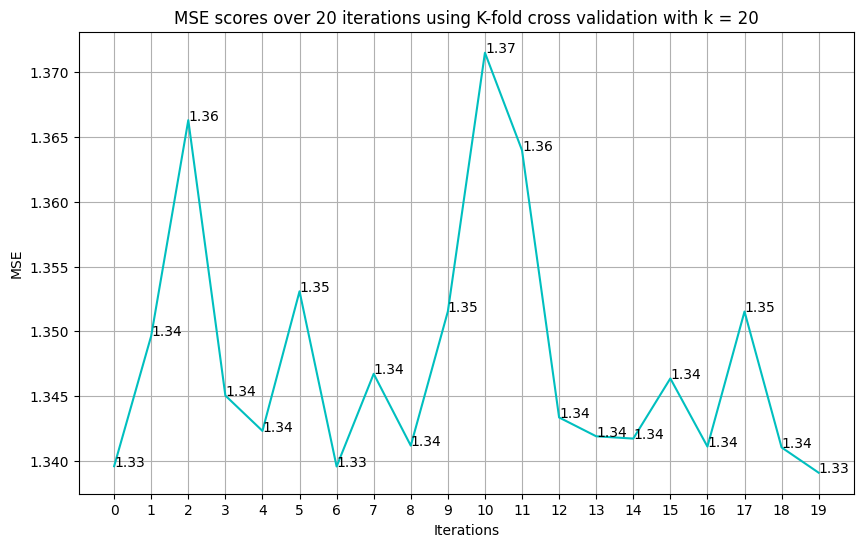

In [27]:
iter = [i for i in range(20)]

fig = plt.figure(figsize=(10, 6))
plt.plot(iter, mse_scores20, 'c')
plt.xticks(np.arange(min(iter), max(iter)+1, 1.0))
plt.title("MSE scores over 20 iterations using K-fold cross validation with k = 20")
plt.xlabel("Iterations")
plt.ylabel("MSE")
for a,b in zip(iter, mse_scores20): 
    plt.text(a, b, str(b)[0:4])
plt.grid()

### Subtask 3

In [28]:
def poly_mse(degree):
    x_train, x_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.7, random_state=42)
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    poly = preprocessing.PolynomialFeatures(degree=degree, include_bias=False)
    poly.fit(scaler.transform(x_train))
    x_train_poly = poly.transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_pred = lr.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    return mse

#### First part

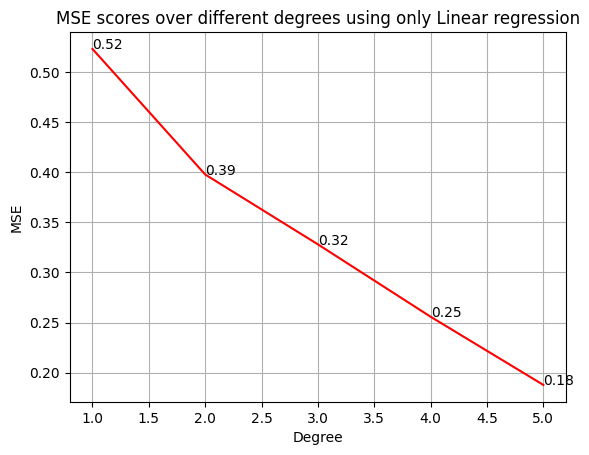

In [29]:
degrees = [1,2,3,4,5]
mses_degree = []
for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(scaler.transform(x_train_scaled))
    x_train_poly = poly.transform(x_train_scaled)
    
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_pred_train = lr.predict(x_train_poly)
    mse = mean_squared_error(y_train, y_pred_train)
    mses_degree.append(mse)

plt.plot(degrees, mses_degree, 'r')
plt.title("MSE scores over different degrees using only Linear regression")
plt.xlabel("Degree")
plt.ylabel("MSE")
for a,b in zip(degrees, mses_degree): 
    plt.text(a, b, str(b)[0:4])
plt.grid()

In [30]:
first = poly_mse(5)
print(f"Using the optimal degree in this case (5), we get an MSE of {first} on the test set.")

Using the optimal degree in this case (5), we get an MSE of 930157590284.1654 on the test set.


### Second Part

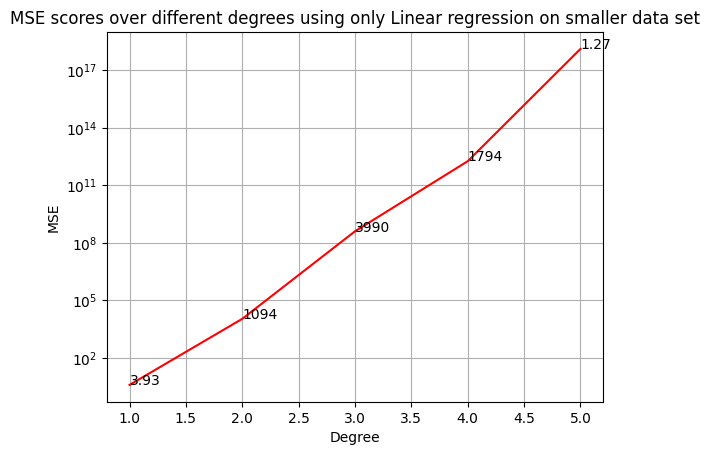

In [31]:
x_train, x_test, y_train2, y_test = train_test_split(x_train_scaled, y_train, test_size=0.5, random_state=42)
degrees = [1,2,3,4,5]
mses_degree_train = []
mses_degree_test = []
for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(scaler.transform(x_train))
    x_train_poly = poly.transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train2)
    y_pred_test = lr.predict(x_test_poly)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mses_degree_test.append(mse_test)

plt.plot(degrees, mses_degree_test, 'r')
plt.title("MSE scores over different degrees using only Linear regression on smaller data set")
plt.xlabel("Degree")
plt.ylabel("MSE")
for a,b in zip(degrees, mses_degree_test): 
    plt.text(a, b, str(b)[0:4])
plt.grid()
plt.yscale("log")


In [32]:
second = poly_mse(1)
print(f"Using the optimal degree in this case (1), we get an MSE of {second} on the test set.")

Using the optimal degree in this case (1), we get an MSE of 0.5275236518754022 on the test set.


### Third subtask

In [33]:
degrees = [1,2,3,4,5]
mses_degree_10 = []
for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(scaler.transform(x_train))
    x_train_poly = poly.transform(x_train)

    mse_scores10 = kfold(10, 1, x_train_poly, y_train)
    mses_degree_10.append(np.mean(mse_scores10))


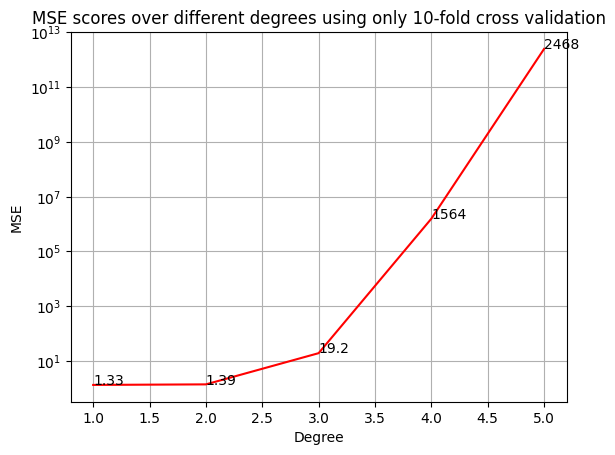

In [34]:
plt.plot(degrees, mses_degree_10, 'r')
plt.title("MSE scores over different degrees using only 10-fold cross validation")
plt.xlabel("Degree")
plt.ylabel("MSE")
for a,b in zip(degrees, mses_degree_10): 
    plt.text(a, b, str(b)[0:4])
plt.grid()
plt.yscale("log")

In [35]:
min_mse = min(mses_degree_10)  # Find the minimum element
min_index = mses_degree_10.index(min_mse)
print(f"The minimal MSE I got with 10-fold cross validations is: {min_mse}, while using a degree of: {min_index+1}.")

The minimal MSE I got with 10-fold cross validations is: 1.3309999367363328, while using a degree of: 1.


### Fourth subtask

In [36]:
degrees = [1,2,3,4,5]
mses_degree_20 = []
for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(scaler.transform(x_train))
    x_train_poly = poly.transform(x_train)

    mse_scores20 = kfold(20, 1, x_train_poly, y_train)
    mses_degree_20.append(np.mean(mse_scores20))

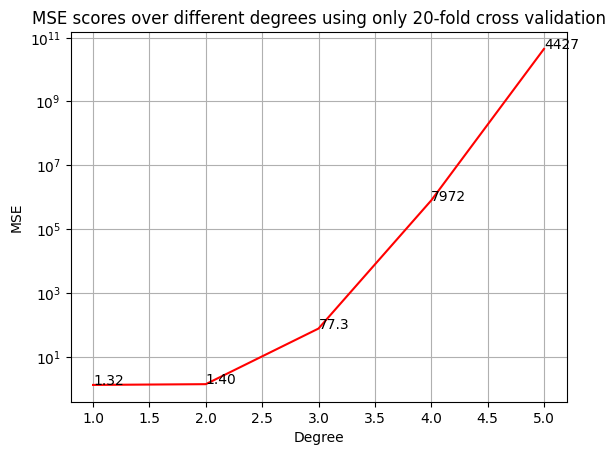

In [37]:
plt.plot(degrees, mses_degree_20, 'r')
plt.title("MSE scores over different degrees using only 20-fold cross validation")
plt.xlabel("Degree")
plt.ylabel("MSE")
for a,b in zip(degrees, mses_degree_20): 
    plt.text(a, b, str(b)[0:4])
plt.grid()
plt.yscale("log")

In [38]:
min_mse = min(mses_degree_20)  # Find the minimum element
min_index = mses_degree_20.index(min_mse)
print(f"The minimal MSE I got with 10-fold cross validations is: {min_mse}, while using a degree of: {min_index+1}.")

The minimal MSE I got with 10-fold cross validations is: 1.3282211905464107, while using a degree of: 1.


### Final calculations

#### Since we only got 2 values for optimal degrees, I will compare the MSE-s for those two degrees (1 and 5).

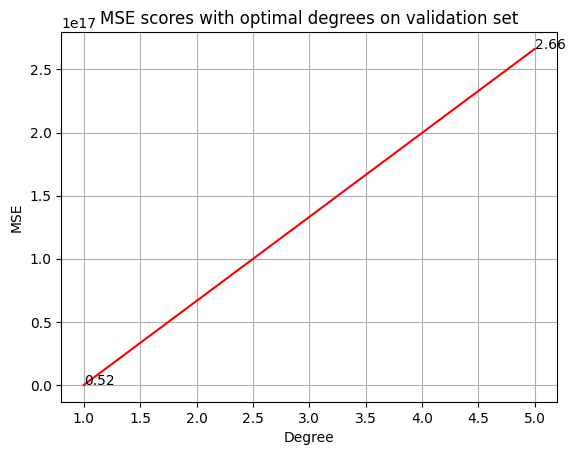

In [40]:
x_train, x_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.7, random_state=42)
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

degrees = [1, 5]
mses_degree = []
for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i, include_bias=False)
    poly.fit(scaler.transform(x_train_scaled))
    x_train_poly = poly.transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)
    
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_pred_test = lr.predict(x_test_poly)
    mse = mean_squared_error(y_test, y_pred_test)
    mses_degree.append(mse)

plt.plot(degrees, mses_degree, 'r')
plt.title("MSE scores with optimal degrees on validation set")
plt.xlabel("Degree")
plt.ylabel("MSE")
for a,b in zip(degrees, mses_degree): 
    plt.text(a, b, str(b)[0:4])
plt.grid()

#### From the picture we clearly see that the optimal degree is 1, which 3/4 models suggested.